In [1]:
import h5py
import numpy as np
from Utils.Transform import transform_kspace_to_image
from Utils.DisplayMultidimensionalimages import display_images 

import matplotlib.pyplot as plt
from Utils.Crop_to_fixed_size4D import crop_to_fixed_size

### Exploration base on ![MRI reconstruction](./Images/OsloPreprocesing.png) - Oslo University

## Train dataset multi-coil

In [2]:
fname_train = 'D:/Base de Datos/Knee/Multi Coil/knee_multicoil_train/file1000001.h5'

with h5py.File(fname_train, 'r') as f:
    ls = list(f.keys())
    print('List of datasets in this file: \n', ls)

    kspace_TRAIN = f.get('kspace')
    kspace_TRAIN = np.array(kspace_TRAIN)
    print('Shape of the array kspace_TRAIN: \n', kspace_TRAIN.shape)

    high_resolution_TRAIN = f.get('reconstruction_rss')
    high_resolution_TRAIN = np.array(high_resolution_TRAIN)
    print('Shape of the array high_resolution_TRAIN: \n', high_resolution_TRAIN.shape)
    f.close()

List of datasets in this file: 
 ['ismrmrd_header', 'kspace', 'reconstruction_rss']
Shape of the array kspace_TRAIN: 
 (36, 15, 640, 372)
Shape of the array high_resolution_TRAIN: 
 (36, 320, 320)


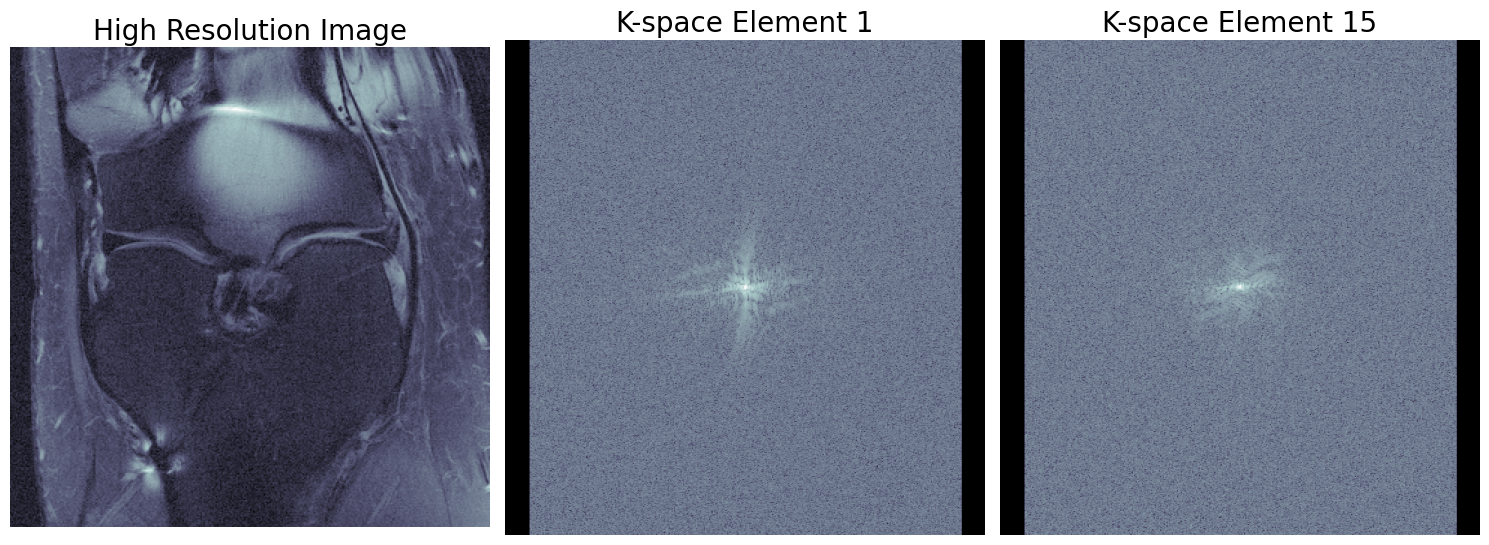

In [5]:
Train_data_kspace = kspace_TRAIN[22]
Train_data_img = high_resolution_TRAIN[22]
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
plt.subplot(1, 3, 1)
plt.imshow(np.log(Train_data_img), cmap='bone')
plt.title('High Resolution Image', fontsize=20)
plt.axis('off')  # Remove axis for better visualization
plt.subplot(1, 3, 2)
plt.imshow(np.log(np.abs(Train_data_kspace[0])+1e-8), cmap='bone', aspect=0.6)
plt.title('K-space Element 1', fontsize=20)
plt.axis('off')  # Remove axis for better visualization
plt.subplot(1, 3, 3)
plt.imshow(np.log(np.abs(Train_data_kspace[14])+1e-8), cmap='bone', aspect=0.6)
plt.title('K-space Element 15', fontsize=20)
plt.axis('off')  # Remove axis for better visualization

plt.tight_layout()
plt.show()



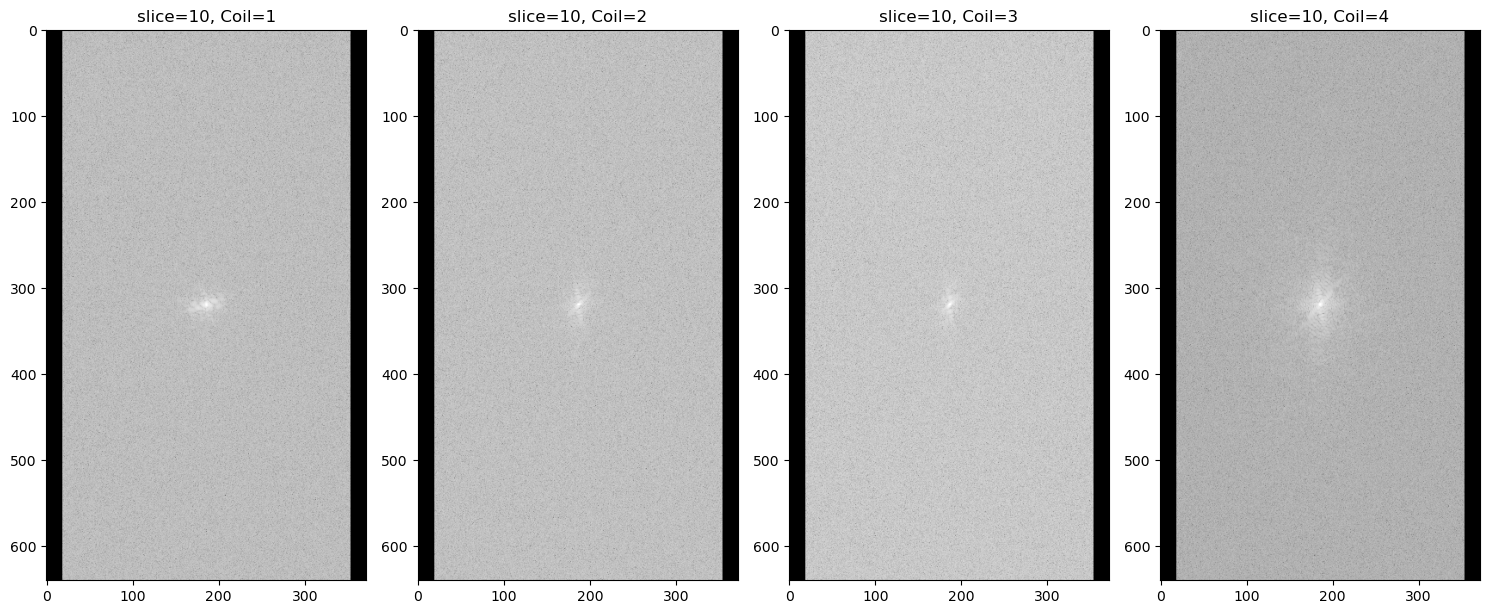

In [14]:

slice = [10] # Two rows (corresponding to a=1 and a=3)
elemento = range(1,5)  # 15 columns (b from 1 to 15)
display_images(kspace_TRAIN, slice, elemento)

In [8]:
imagespace_TRAIN = transform_kspace_to_image(kspace_TRAIN, dim=(2,3))
imagespace_TRAIN.shape

(36, 15, 640, 372)

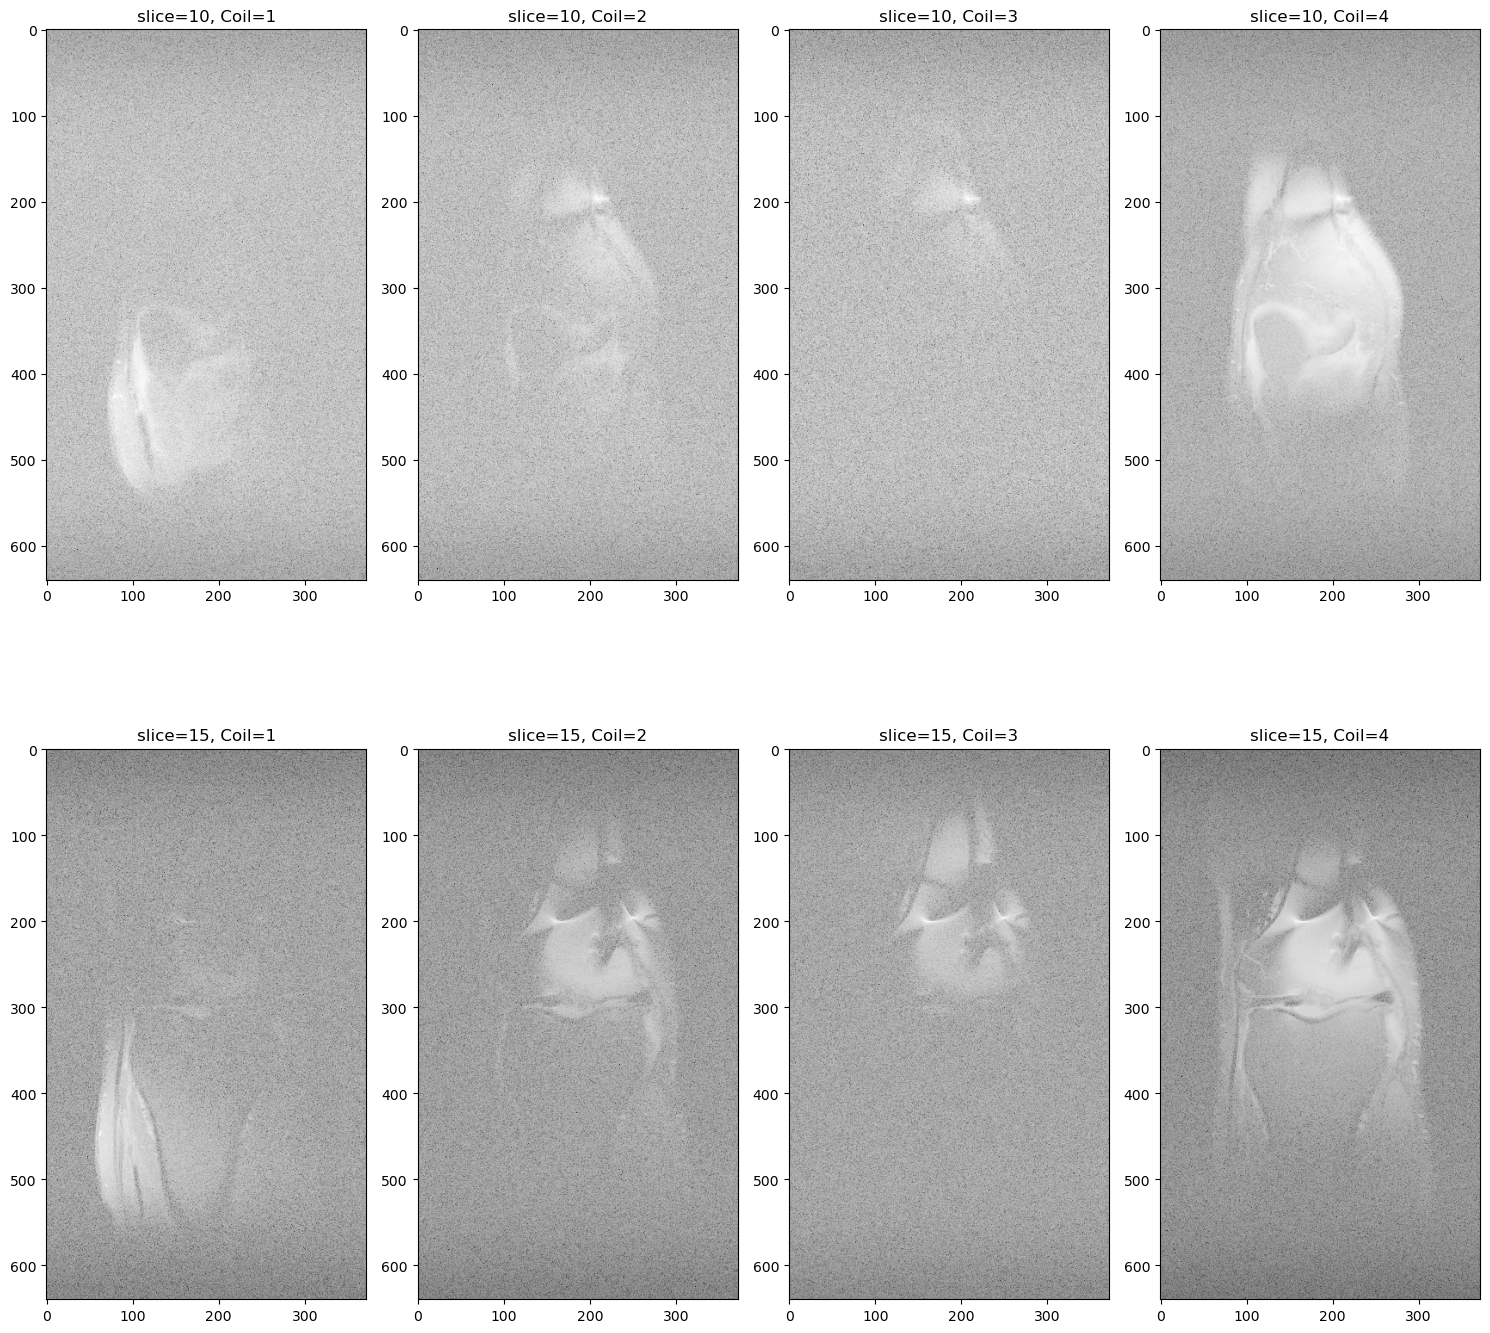

In [9]:
display_images(imagespace_TRAIN, slice, elemento)

In [10]:
imagespace_mag_TRAIN = np.abs(imagespace_TRAIN)

imagespace_crop_TRAIN = crop_to_fixed_size(imagespace_mag_TRAIN)

squared_kspace_TRAIN = np.square(imagespace_crop_TRAIN)

# Step 2: Sum along the second dimension (axis 1)
sum_squared_TRAIN = np.sum(squared_kspace_TRAIN, axis=1)

# Step 3: Take the square root of the sum
result_TRAIN = np.sqrt(sum_squared_TRAIN)

print(f'Compute magnitud : {imagespace_mag_TRAIN.shape}')
print('============================================')
print(f'imagespace_crop {imagespace_mag_TRAIN.shape}')
print('============================================')
print(f'square_kspace : {squared_kspace_TRAIN.shape}')
print('============================================')
print(f'sum_squared : {sum_squared_TRAIN.shape}')
print('============================================')
print(f'result : {result_TRAIN.shape}')
print('============================================')

Compute magnitud : (36, 15, 640, 372)
imagespace_crop (36, 15, 640, 372)
square_kspace : (36, 15, 320, 320)
sum_squared : (36, 320, 320)
result : (36, 320, 320)


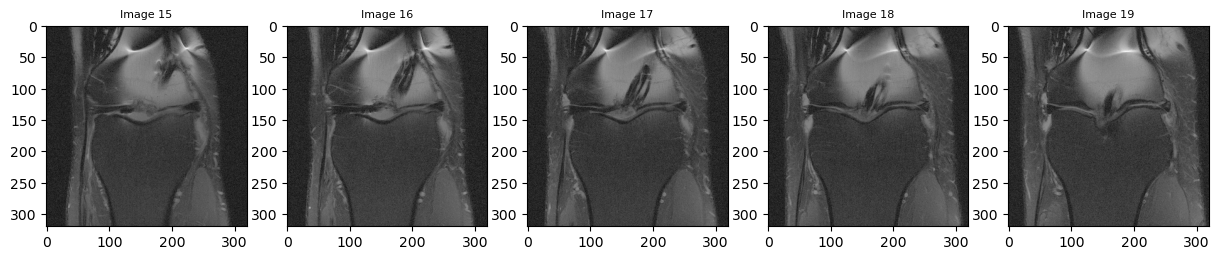

In [11]:
b = range(15, 20)
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
for i, idx in enumerate(b):
    plt.subplot(3, 5, i + 1)  # Create subplots based on rows and cols
    plt.imshow(np.log(np.abs(result_TRAIN[idx])), cmap='gray')  
    plt.title(f'Image {idx}', fontsize=8)
    #plt.axis('off')  # Remove axis for better visualization

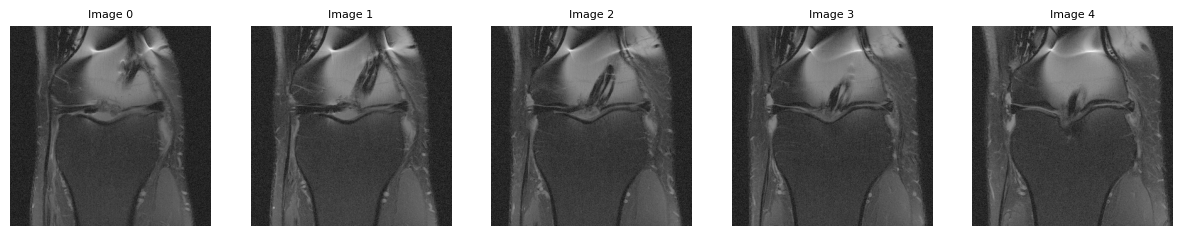

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
for i, idx in enumerate(b):
    plt.subplot(3, 5, i + 1)  # Create subplots based on rows and cols
    plt.imshow(np.log(np.abs(high_resolution_TRAIN[idx])), cmap='gray')
    plt.title(f'Image {i}', fontsize=8)
    plt.axis('off')  # Remove axis for better visualization



## Val dataset

In [12]:
fname_val = 'D:/Base de Datos/Multi Coil/knee_multicoil_val/multicoil_val/file1000000.h5'

with h5py.File(fname_val, 'r') as f:
    ls = list(f.keys())
    print('List of datasets in this file: \n', ls)

    kspace_VAL = f.get('kspace')
    kspace_VAL = np.array(kspace_VAL)
    print('Shape of the array kspace_VAL: \n', kspace_VAL.shape)

    high_resolution_VAL = f.get('reconstruction_rss')
    high_resolution_VAL = np.array(high_resolution_VAL)
    print('Shape of the array high_resolution_VAL: \n', high_resolution_VAL.shape)
    f.close()

List of datasets in this file: 
 ['ismrmrd_header', 'kspace', 'reconstruction_rss']
Shape of the array kspace_VAL: 
 (35, 15, 640, 368)
Shape of the array high_resolution_VAL: 
 (35, 320, 320)


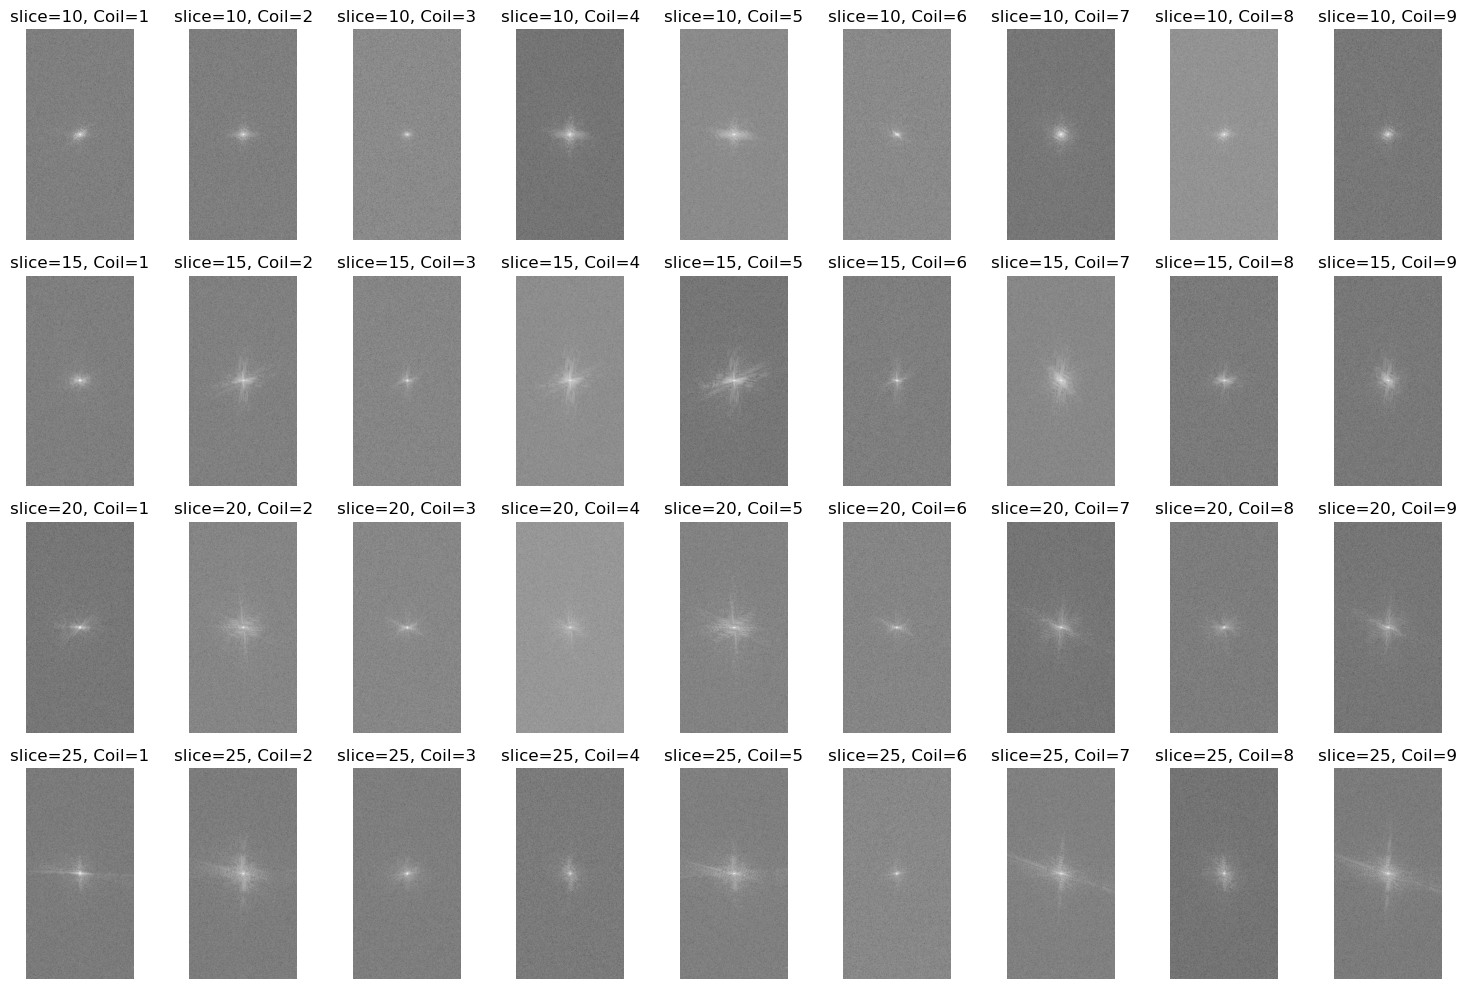

In [14]:
slice = [10,15,20,25] # Two rows (corresponding to a=1 and a=3)
elemento = range(1,10)  # 15 columns (b from 1 to 15)
display_images(kspace_VAL, slice, elemento)

In [16]:
imagespace_VAL = transform_kspace_to_image(kspace_VAL, dim=(2,3))
imagespace_VAL.shape

(35, 15, 640, 368)

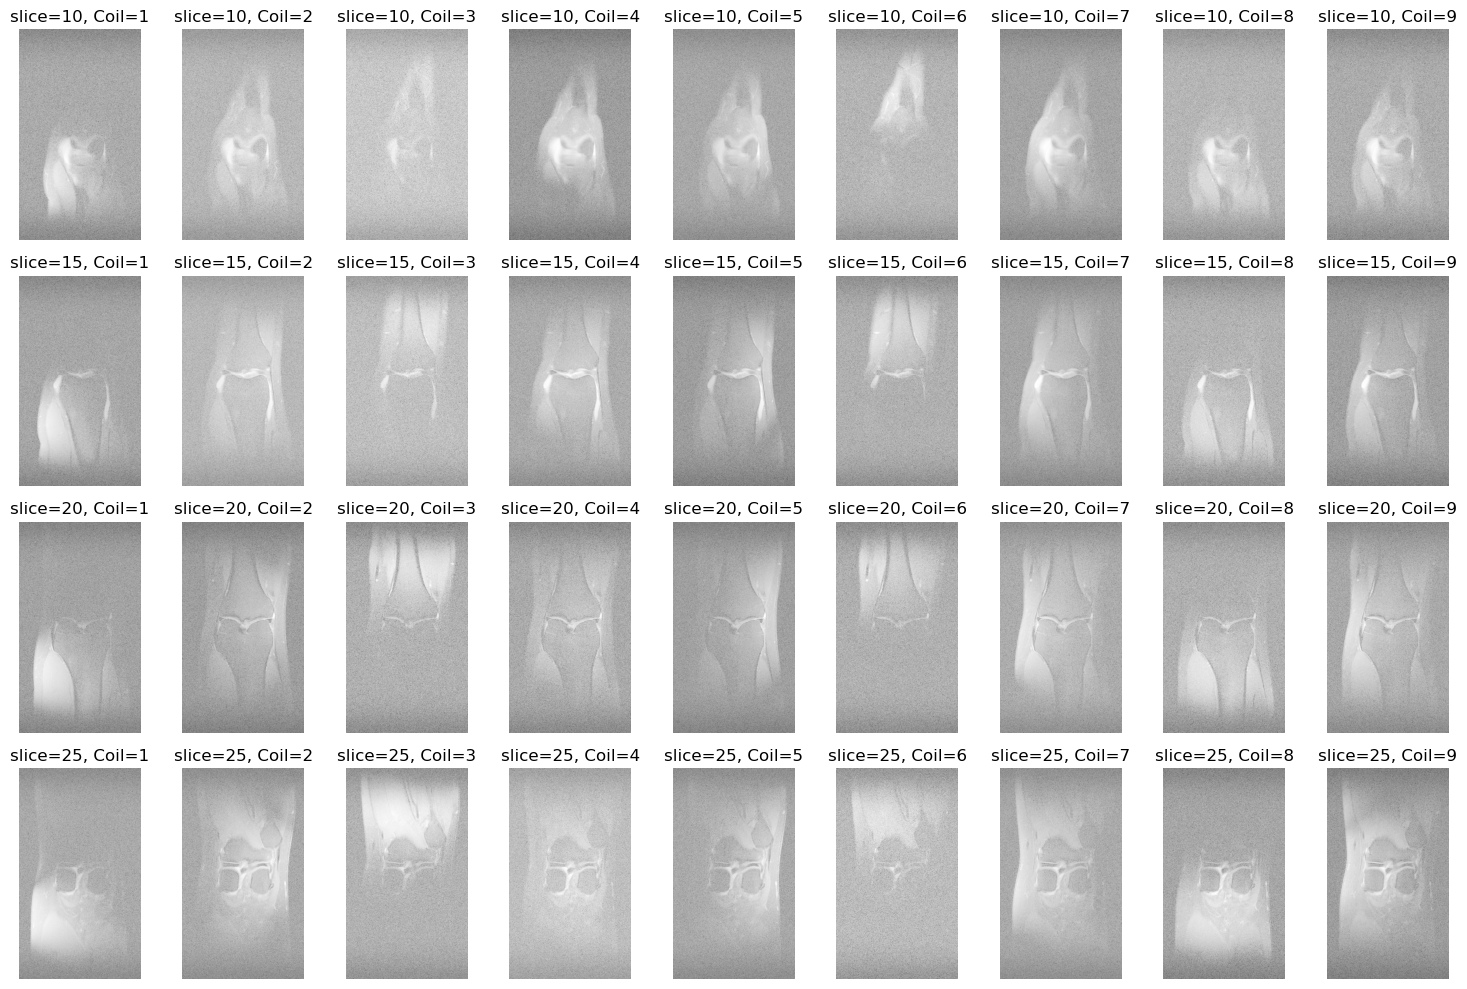

In [17]:
display_images(imagespace_VAL, slice, elemento)

In [27]:
imagespace_mag_VAL = np.abs(imagespace_VAL)

imagespace_crop_VAL = crop_to_fixed_size(imagespace_mag_VAL)

squared_kspace_VAL = np.square(imagespace_crop_VAL)

# Step 2: Sum along the second dimension (axis 1)
sum_squared_VAL = np.sum(squared_kspace_VAL, axis=1)

# Step 3: Take the square root of the sum
result_VAL = np.sqrt(sum_squared_VAL)

print(f'Compute magnitud VAL: {imagespace_mag_VAL.shape}')
print('============================================')
print(f'imagespace_crop VAL :{imagespace_crop_VAL.shape}')
print('============================================')
print(f'square_kspace VAL : {squared_kspace_VAL.shape}')
print('============================================')
print(f'sum_squared VAL : {sum_squared_VAL.shape}')
print('============================================')
print(f'result VAL : {result_VAL.shape}')
print('============================================')

Compute magnitud VAL: (35, 15, 640, 368)
imagespace_crop VAL :(35, 15, 320, 320)
square_kspace VAL : (35, 15, 320, 320)
sum_squared VAL : (35, 320, 320)
result VAL : (35, 320, 320)


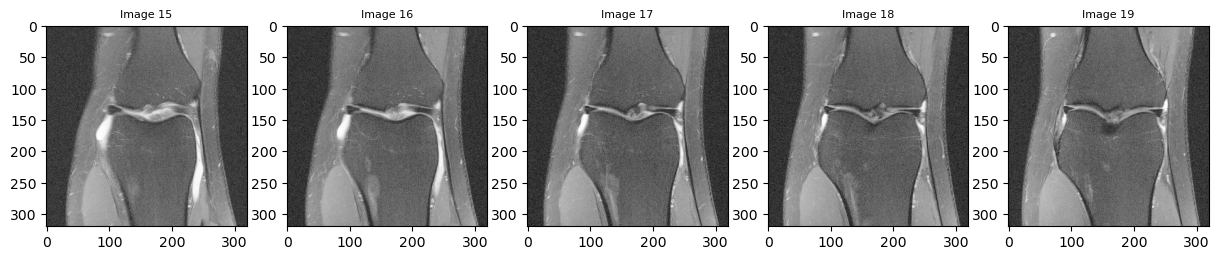

In [28]:
b = range(15, 20)
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
for i, idx in enumerate(b):
    plt.subplot(3, 5, i + 1)  # Create subplots based on rows and cols
    plt.imshow(np.log(np.abs(result_VAL[idx])), cmap='gray')  
    plt.title(f'Image {idx}', fontsize=8)
    #plt.axis('off')  # Remove axis for better visualization

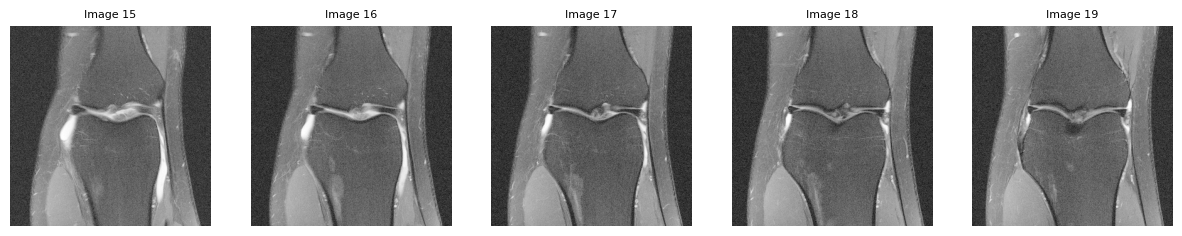

In [29]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
for i, idx in enumerate(b):
    plt.subplot(3, 5, i + 1)  # Create subplots based on rows and cols
    plt.imshow(np.log(np.abs(high_resolution_VAL[idx])), cmap='gray')
    plt.title(f'Image {idx}', fontsize=8)
    plt.axis('off')  # Remove axis for better visualization

## Test dataset

In [47]:
fname_test = 'D:/Base de Datos/Knee/Multi Coil/knee_multicoil_test/multicoil_test/file1000082.h5'

with h5py.File(fname_test, 'r') as f:
    ls = list(f.keys())
    print('List of datasets in this file: \n', ls)

    kspace_test = f.get('kspace')
    kspace_test = np.array(kspace_test)
    print('Shape of the array kspace_VAL: \n', kspace_test.shape)

    mask_test = f.get('mask')
    mask_test = np.array(mask_test)
    print('Shape of the mask_test: \n', mask_test.shape)
    f.close()

List of datasets in this file: 
 ['ismrmrd_header', 'kspace', 'mask']
Shape of the array kspace_VAL: 
 (38, 15, 640, 368)
Shape of the mask_test: 
 (368,)


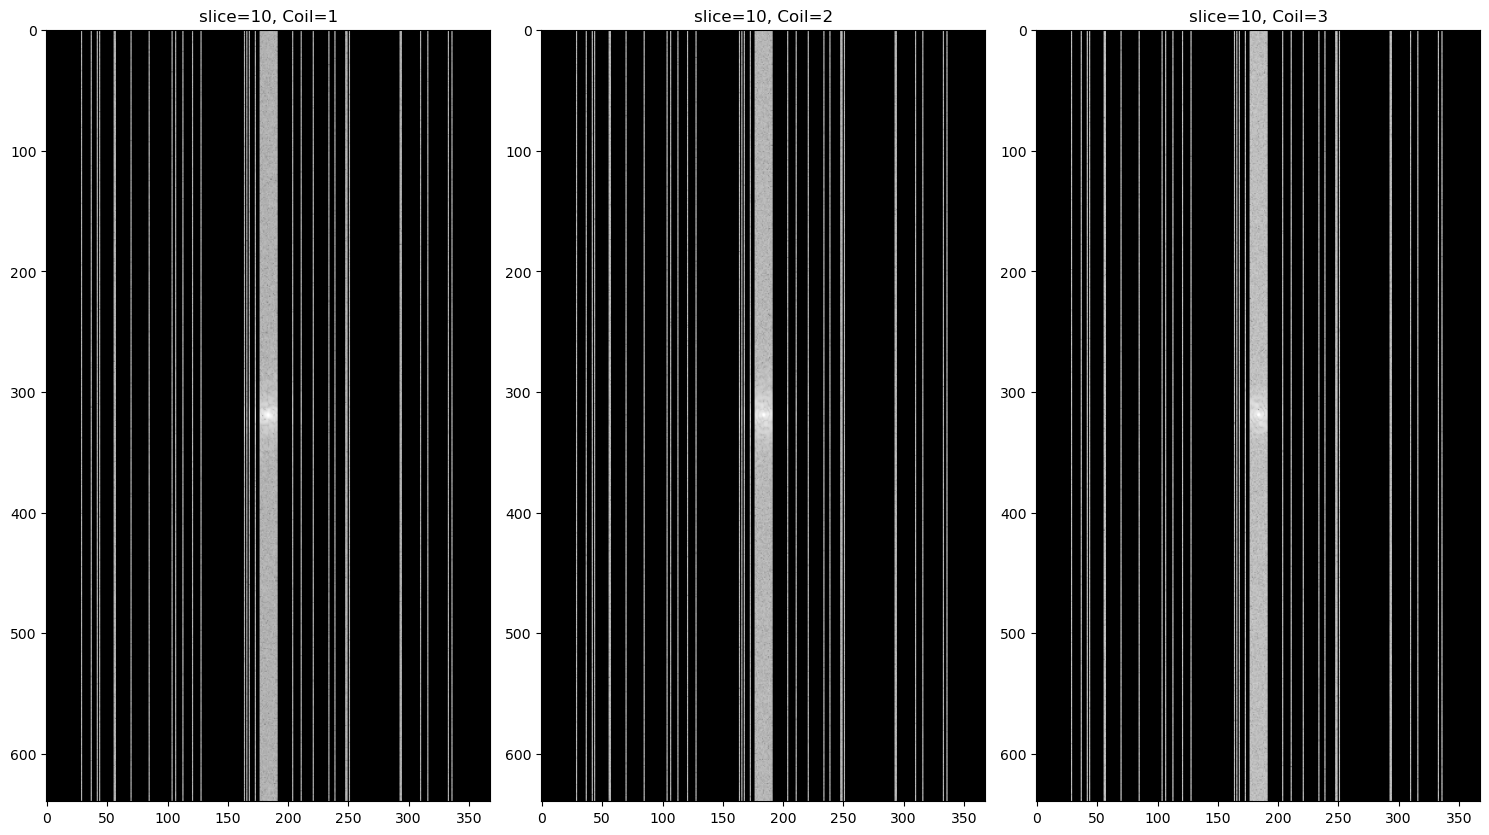

In [48]:
slice = [10] # Two rows (corresponding to a=1 and a=3)
elemento = range(1,4)  # 15 columns (b from 1 to 15)
display_images(kspace_test, slice, elemento)

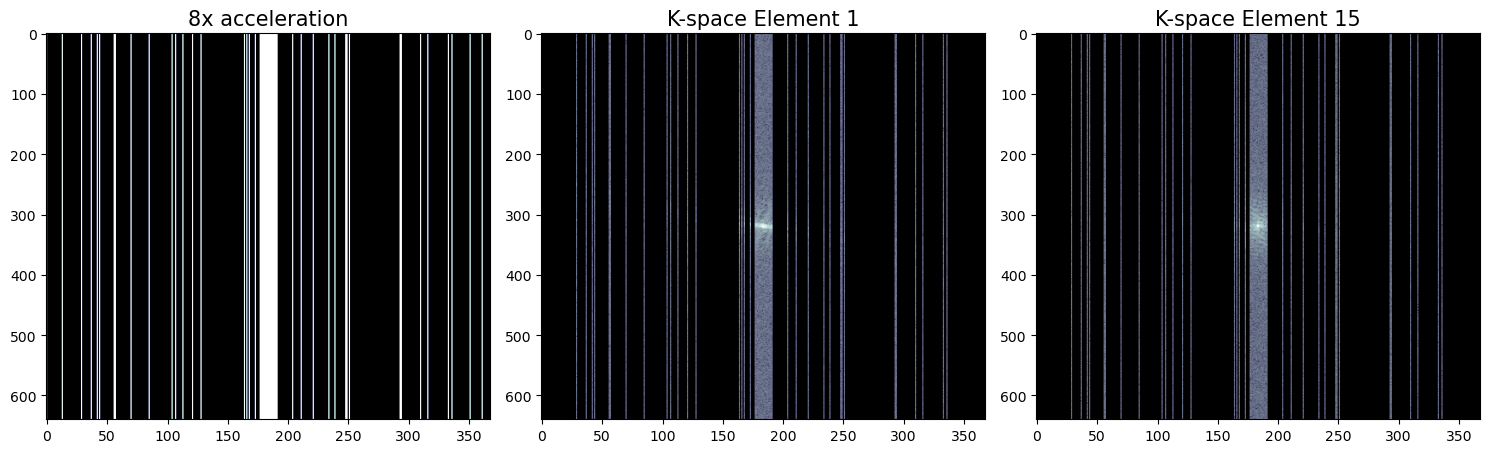

In [74]:
Kspace_test_slide = kspace_test[22]
matrix = np.tile(mask_test, (640,1))
undersample_percentage = np.round((np.sum(mask_test == 1) / mask_test.size) * 100,2)
plt.figure(figsize=(15,15))
plt.subplot(1, 3, 3)
plt.imshow(np.log(np.abs(Kspace_test_slide[14])+1e-8), cmap='bone', aspect=0.5)
plt.title('K-space Element 15', fontsize=15)
plt.subplot(1, 3, 2)
plt.imshow(np.log(np.abs(Kspace_test_slide[0])+1e-8), cmap='bone', aspect=0.5)
plt.title('K-space Element 1', fontsize=15)
plt.subplot(1, 3, 1)
plt.imshow(matrix, cmap='bone', aspect=0.5)
plt.title(f'8x acceleration', fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
# Next Steps : Make a mask check out the paper about data automation. In special because there was a good explanation about the noise in the mask.
#Data augmentation for deep learning based accelerated MRI reconstruction with limited data.